<a href="https://colab.research.google.com/github/Asir-kamal/Predicting_Disaster_Tweets-using-LSTM/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [2]:
# Load the Drive helper and mount

# from google.colab import drive
# # This will prompt for authorization.
# drive.mount('/content/drive')



## Import libraries

In [3]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import re
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

##Reading Data

In [4]:
#Paths

# train_path='/content/drive/MyDrive/ML/AMIT_AI/Project/train.csv'

# test_path='/content/drive/MyDrive/ML/AMIT_AI/Project/test.csv'


train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
# train=pd.read_csv(train_path)
# test=pd.read_csv(test_path)

In [6]:
train.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# Data Preprocessing

## Target analysis 

In [57]:
# train.groupby('seismic')
filter = train.groupby(['keyword','target'])#gruopby grouping the data according to the categories and apply a function to the categories. i choosed keyword to group the data based on it
filter.get_group(('fatal',1))

,index,id,keyword,location,text,target
0,0,1,fatal,NaN,deed reason may allah forgiv,1
1,1,4,fatal,NaN,forest fire near rong sask canada,1
2,2,5,fatal,NaN,resid ask shelter place notifi offic evacu she...,1
3,3,6,fatal,NaN,peopl receiv evacu order california,1
4,4,7,fatal,NaN,got sent photo rubi smoke pour school,1
5,5,8,fatal,NaN,updat california hwi close direct due lake cou...,1
6,6,10,fatal,NaN,heavi rain caus flash flood street manit color...,1
7,7,13,fatal,NaN,top hill see fire wood,1
8,8,14,fatal,NaN,emerg evacu happen build across street,1
9,9,15,fatal,NaN,afraid tornado come area,1


In [58]:
unique_value=train['keyword'].unique()
data_name=[]
data_count1=[]
data_count0=[]

for i in range(1,len(train['keyword'].unique())):

  filter = train.groupby(['keyword','target'])#gruopby grouping the data according to the categories and apply a function to the categories. i choosed keyword to group the data based on it
  data_name.append(train['keyword'].unique()[i])
  try:
    data_count1.append(len(filter.get_group((train['keyword'].unique()[i],1)))) 
  except KeyError :
    data_count1.append(0)
  try:
    data_count0.append(len(filter.get_group((unique_value[i],0))))
  except KeyError :
    data_count0.append(0)





In [59]:
data=np.array([[data_name][0],[data_count1][0],[data_count0][0]])
data.shape

(3, 165)

In [60]:
data=np.transpose(data)
data.shape

(165, 3)

In [61]:
data=pd.DataFrame(data=data,columns=['keyword','target 1','target 0'])

In [62]:
data.head(5)

,keyword,target 1,target 0
0,ablaz,13,23
1,accid,24,11
2,aftershock,0,34
3,airplan accid,30,5
4,ambul,20,18


In [63]:
data['target 0']=data['target 0'].astype(int)
data['target 1']=data['target 1'].astype(int)

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f3c894ede90>>

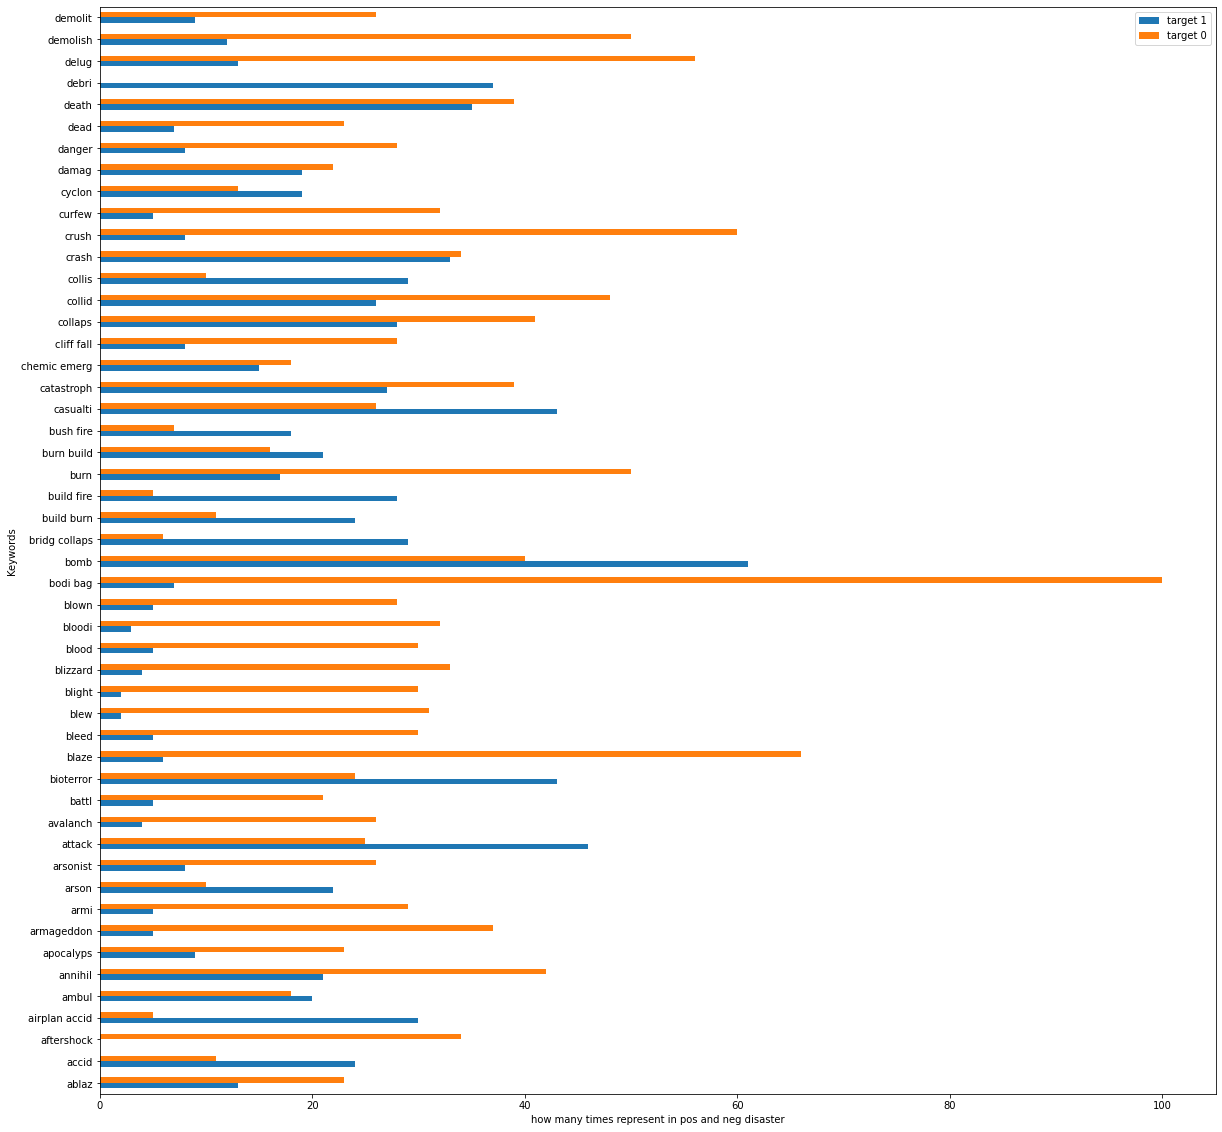

In [64]:
ax=data[:50].plot.barh(figsize=(20,20))#The size in figsize=(5,3) is given in inches per (width, height).
ax.set_yticklabels(data['keyword'][:50])
ax.set_ylabel("Keywords")
ax.set_xlabel("how many times represent in pos and neg disaster")
ax.set




Text(0.5, 0, 'how many times represent in pos and neg disaster')

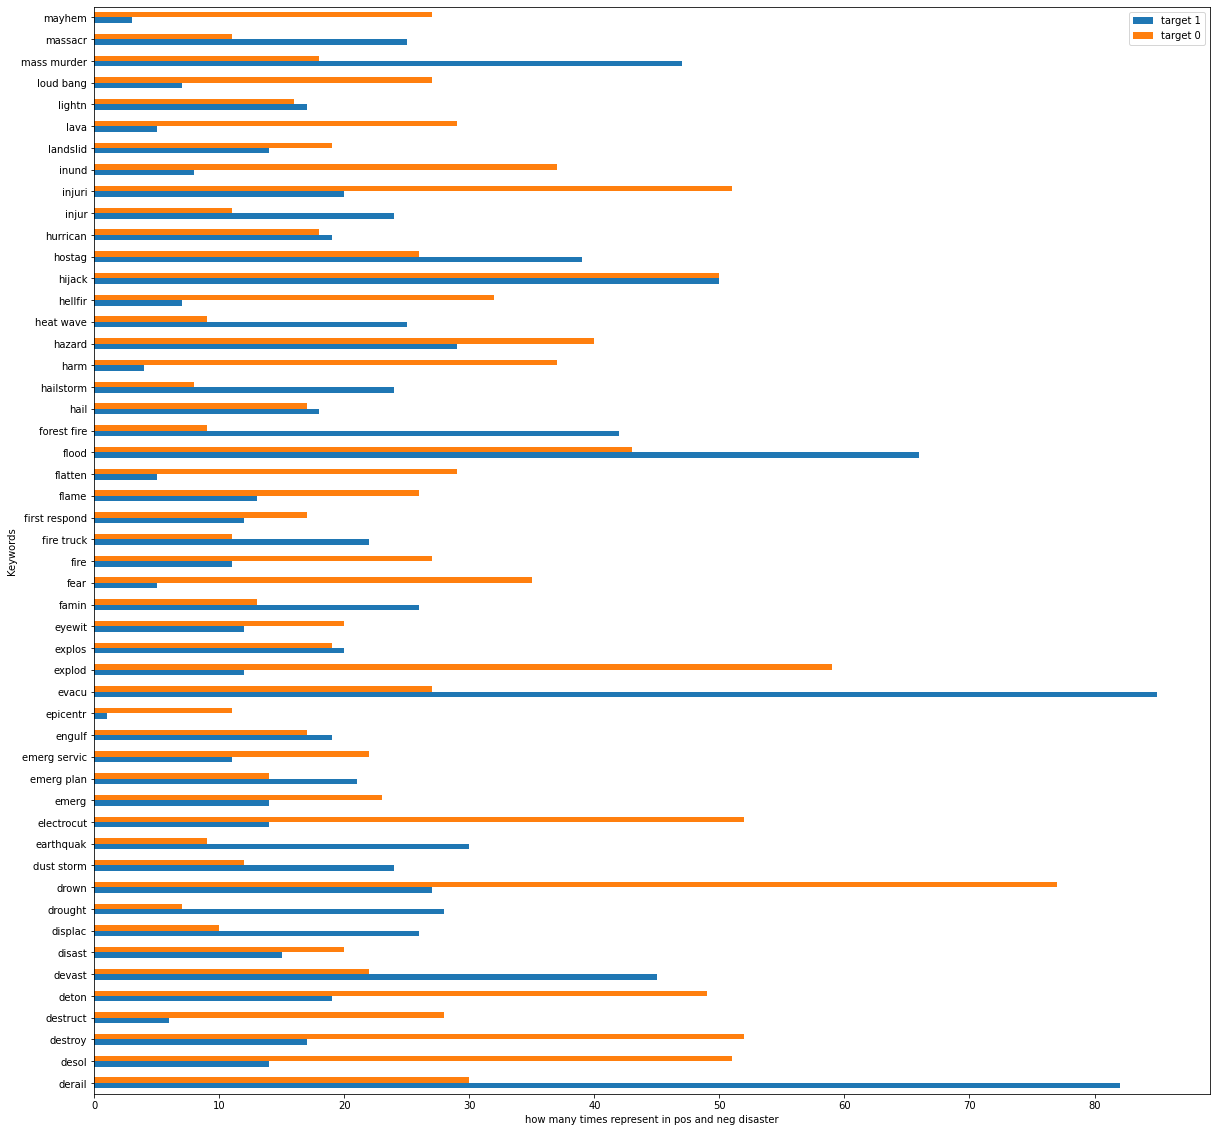

In [65]:
ax=data[50:100].plot.barh(figsize=(20,20))#The size in figsize=(5,3) is given in inches per (width, height).
ax.set_yticklabels(data['keyword'][50:100])
ax.set_ylabel("Keywords")
ax.set_xlabel("how many times represent in pos and neg disaster")



Text(0.5, 0, 'how many times represent in pos and neg disaster')

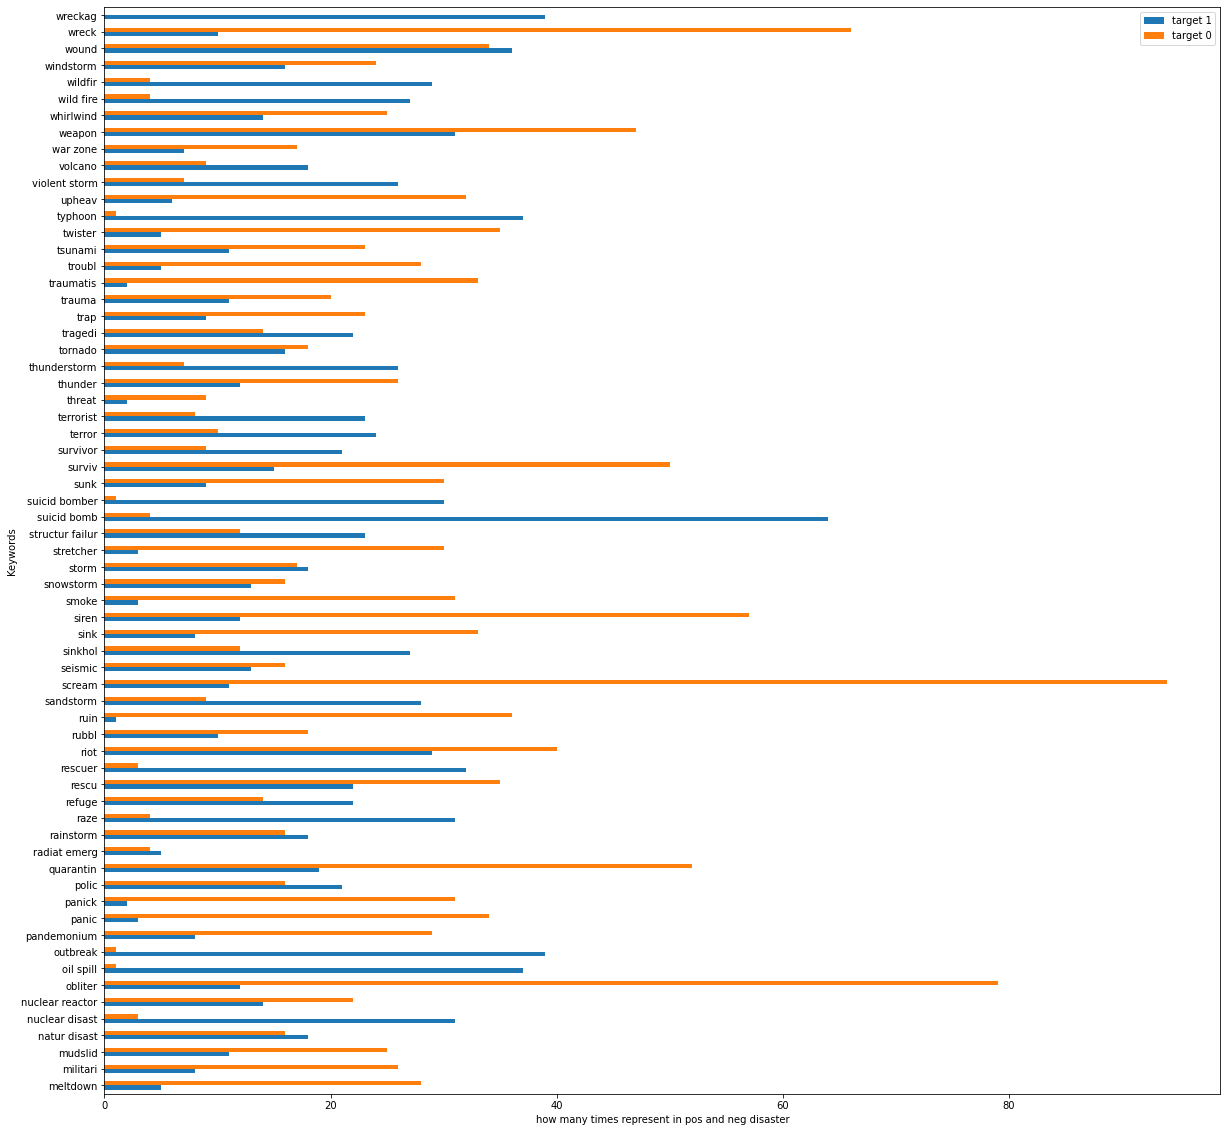

In [66]:
ax=data[100:167].plot.barh(figsize=(20,20))#The size in figsize=(5,3) is given in inches per (width, height).
ax.set_yticklabels(data['keyword'][100:167])
ax.set_ylabel("Keywords")
ax.set_xlabel("how many times represent in pos and neg disaster")



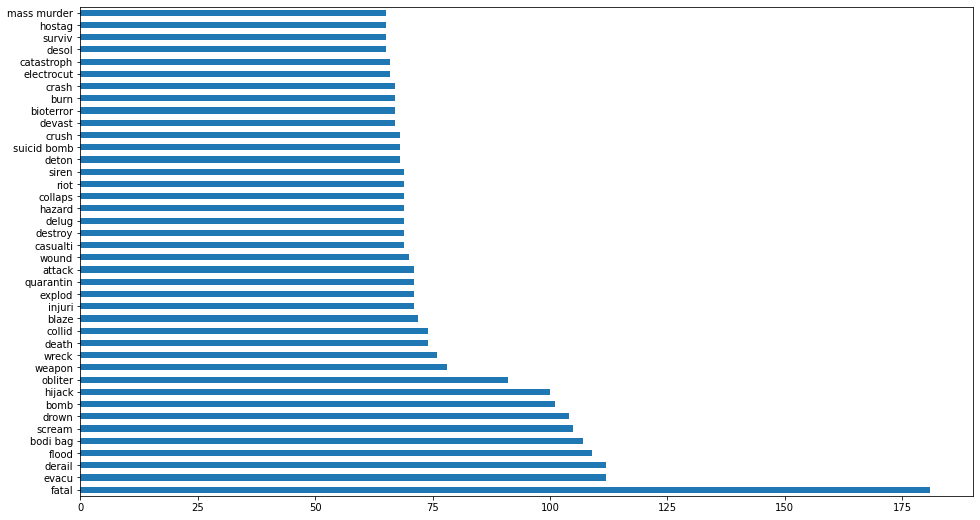

In [67]:
plt.figure(figsize=(16,9))
train['keyword'].value_counts()[:40].plot(kind='barh')
plt.show()

In [68]:
train['keyword'].unique()

array(['fatal', 'ablaz', 'accid', 'aftershock', 'airplan accid', 'ambul',
       'annihil', 'apocalyps', 'armageddon', 'armi', 'arson', 'arsonist',
       'attack', 'avalanch', 'battl', 'bioterror', 'blaze', 'bleed',
       'blew', 'blight', 'blizzard', 'blood', 'bloodi', 'blown',
       'bodi bag', 'bomb', 'bridg collaps', 'build burn', 'build fire',
       'burn', 'burn build', 'bush fire', 'casualti', 'catastroph',
       'chemic emerg', 'cliff fall', 'collaps', 'collid', 'collis',
       'crash', 'crush', 'curfew', 'cyclon', 'damag', 'danger', 'dead',
       'death', 'debri', 'delug', 'demolish', 'demolit', 'derail',
       'desol', 'destroy', 'destruct', 'deton', 'devast', 'disast',
       'displac', 'drought', 'drown', 'dust storm', 'earthquak',
       'electrocut', 'emerg', 'emerg plan', 'emerg servic', 'engulf',
       'epicentr', 'evacu', 'explod', 'explos', 'eyewit', 'famin', 'fear',
       'fire', 'fire truck', 'first respond', 'flame', 'flatten', 'flood',
       'forest fir

##Data Cleaning

In [7]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
(train.isnull().sum()/len(train))*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [11]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

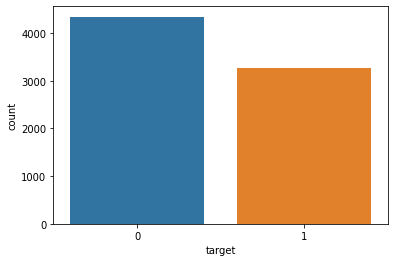

In [12]:
sns.countplot(x='target',data=train)

In [13]:
pd.set_option("display.max_rows", 30)
pd.set_option("display.min_rows", 30)
train['location'].value_counts()[:20]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
Florida             14
Name: location, dtype: int64

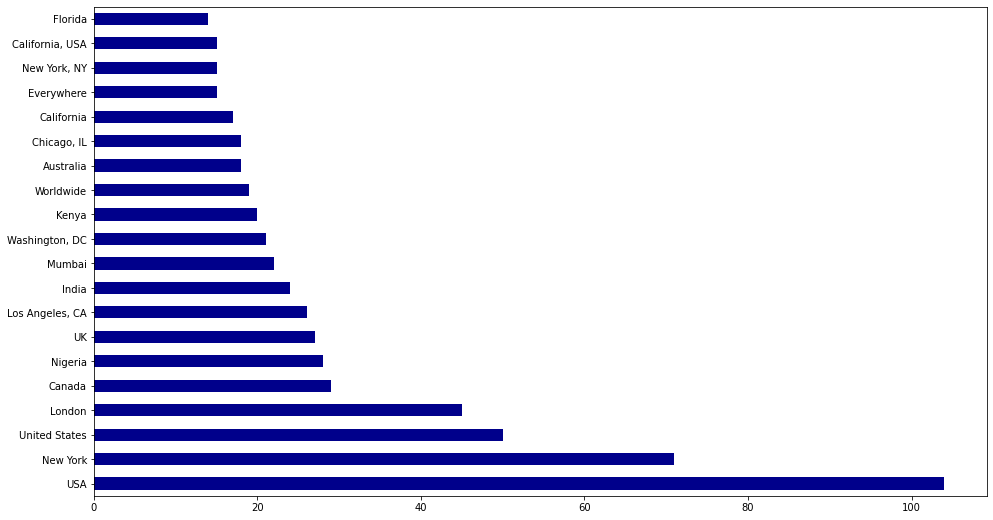

In [14]:
plt.figure(figsize=(16,9))
train['location'].value_counts()[:20].plot(kind='barh',color='darkblue')
plt.show()

In [15]:
train['keyword'].value_counts()[:30]

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
explosion      39
whirlwind      39
earthquake     39
derailment     39
wreckage       39
collision      39
flames         39
wrecked        39
oil%20spill    38
flooding       38
Name: keyword, dtype: int64

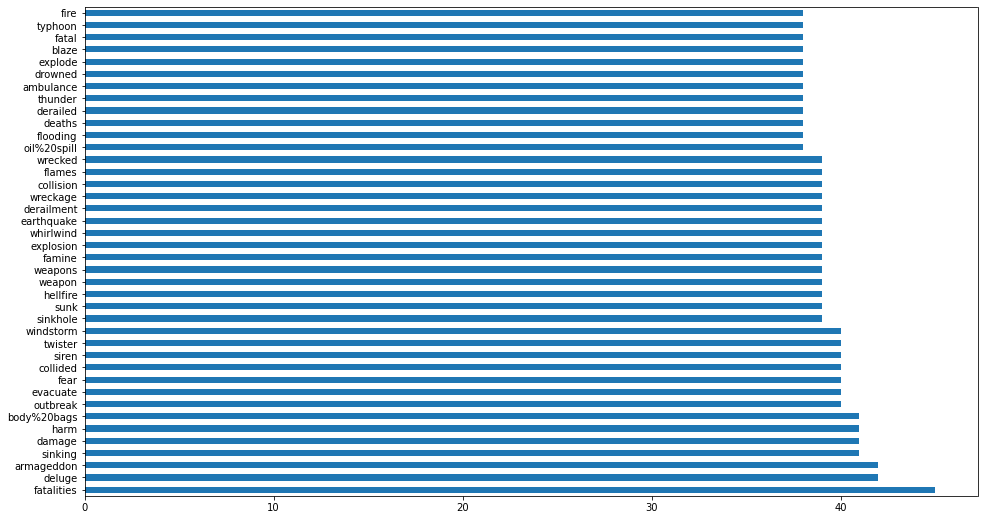

In [16]:
plt.figure(figsize=(16,9))
train['keyword'].value_counts()[:40].plot(kind='barh')
plt.show()

In [17]:
# train.groupby('seismic')
gk = train.groupby('keyword')#gruopby grouping the data according to the categories and apply a function to the categories. i choosed keyword to group the data based on it
gk.get_group('fatalities') #here I categorized the data based on raw to be fatalities


,id,keyword,location,text,target
3616,5162,fatalities,NaN,EXCLUSIVE: In 179 fatalities involving on-duty...,1
3617,5164,fatalities,New York,#NYC #News Legionnaires death toll rises to 8 ...,1
3618,5165,fatalities,"New York City ,NY",Let's fraction the vital need for Our fataliti...,0
3619,5166,fatalities,NaN,Las Vegas in top 5 cities for red-light runnin...,0
3620,5168,fatalities,"Corpus Christi, Texas",We are totally unprepared for an EMP attack. B...,1
3621,5169,fatalities,Cape Town,City implores motorists not to speed after mor...,1
3622,5170,fatalities,NaN,@kyrikoni @ExpressandStar Who said veg and fru...,0
3623,5171,fatalities,Wolverhampton/Brum/Jersey,Understand that there are no fatalities as no ...,1
3624,5172,fatalities,"Chamblee, Georgia",As of the 6-month mark there were a total of 6...,1
3625,5174,fatalities,Official Website,#HSE releases annual workplace facilities data...,0


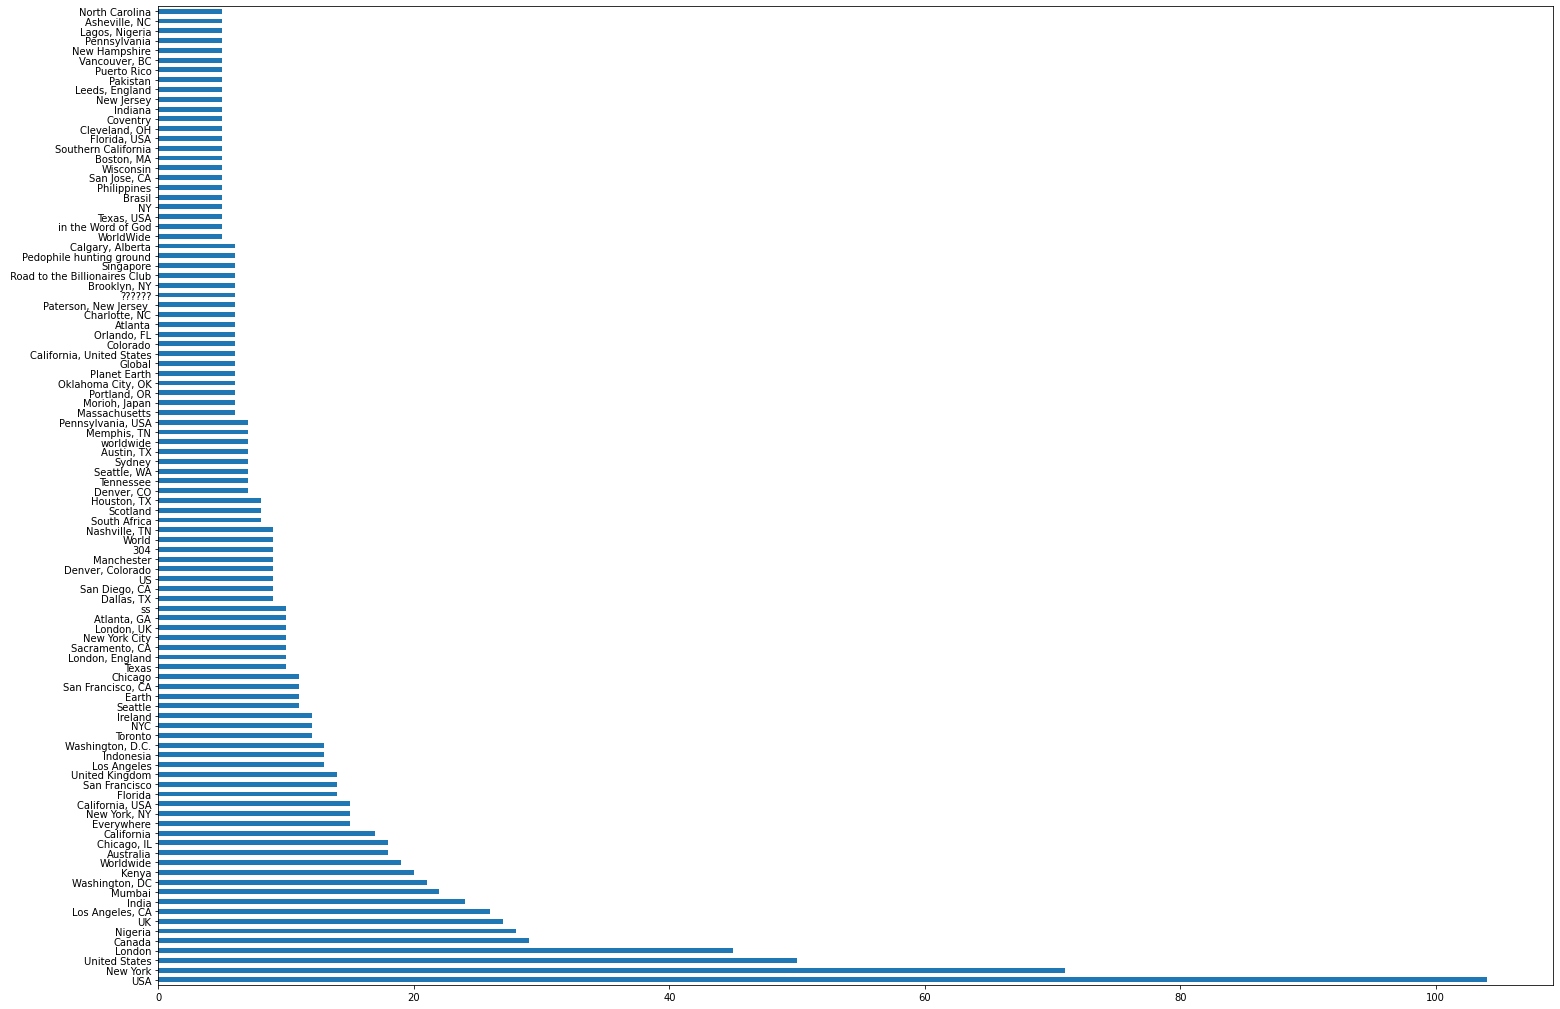

In [32]:
plt.figure(figsize=(25,18))
train['location'].value_counts()[:100].plot(kind='barh')
plt.show()

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def cleantext(word):
  word=re.sub(r'https?:\S+','',word)#replace any http or https w 2y haga nesh psace b3dha with ''
  word=re.sub(r'@\S+','',word)#replace any @ w 2y haga mesh space b3dha(\S) mra 2w 2ktr mn mra(+) with ''
  word=re.sub(r'#\S+','',word)#replace any # w 2y haga mesh space b3dha(\S) mra 2w 2ktr mn mra(+) with ''
  word=re.sub(r'_\S+','',word)#replace any _ w 2y haga mesh space b3dha(\S) mra 2w 2ktr mn mra(+) with ''
  word=re.sub(r'\W+',' ',word) #replace 2y haga mesh chracher wala digit wala underscore ''
  word=re.sub(r'\d+','',word) #replace any digitw 2y haga mesh space b3dha(\S) mra 2w 2ktr mn mra(+) with ''
  word=re.sub(r'[^\x00-\x80]','',word)
  word=re.sub(r'\s{1,2}\w{1,2}\s{1,2}?',' ',word)#replace any one or more spcae(\s+) fe 25r 2l gomla with ''
  word=re.sub(r'(.)\1{2,}','\1',word)#replace any repeated characters more than 3 times with one like zzzzz by z ''
  
  word=re.sub(r'^\s+','',word)#replace any one or more spcae(\s+) fe 2wl 2l gomla with ''
  word=re.sub(r'\s+$','',word)#replace any one or more spcae(\s+) fe 25r 2l gomla with ''
  word=re.sub(r'\s+',' ',word)#replace any one or more spcae(\s+) fe 25r 2l gomla with ''

  return word

In [35]:
stop_words=stopwords.words('english')
stop_words.append('u')
stop_words.append('us')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
words=[]
for i in train['text']:
  # print(i)
  word=re.sub(r'https?:\S+','',i)#replace any http or https w 2y haga nesh psace b3dha with ''
  word=re.sub(r'@\S+','',word)#replace any @ w 2y haga mesh space b3dha(\S) mra 2w 2ktr mn mra(+) with ''
  word=re.sub(r'#\S+','',word)#replace any # w 2y haga mesh space b3dha(\S) mra 2w 2ktr mn mra(+) with ''
  word=re.sub(r'_\S+','',word)#replace any _ w 2y haga mesh space b3dha(\S) mra 2w 2ktr mn mra(+) with ''
  word=re.sub(r'\W+',' ',word) #replace 2y haga mesh chracher wala digit wala underscore ''
  word=re.sub(r'\d+','',word) #replace any digitw 2y haga mesh space b3dha(\S) mra 2w 2ktr mn mra(+) with ''
  word=re.sub(r'[^\x00-\x80]','',word)
  word=re.sub(r'\s{1,2}\w{1,2}\s{1,2}?',' ',word)#replace any one or more spcae(\s+) fe 25r 2l gomla with ''
  word=re.sub(r'(.)\1{2,}','\1',word)#replace any repeated characters more than 3 times with one like zzzzz by z ''
  word=re.sub(r'^\s+','',word)#replace any one or more spcae(\s+) fe 2wl 2l gomla with ''
  word=re.sub(r'\s+$','',word)#replace any one or more spcae(\s+) fe 25r 2l gomla with ''
  word=re.sub(r'\s+',' ',word)#replace any one or more spcae(\s+) fe 25r 2l gomla with ''
  x=word
  word=' '.join([wordx for wordx in word.split() if wordx.lower() not in stop_words])
  if len(word) <2:
    print(word,"2")
  
  # c=re.findall('\s{1,2}\w{1,2}\s{1,2}?',x)
  # c=re.findall('(.)\1{3,}',x)

  # print(c)


 2
 2
 2
 2
 2
 2


In [37]:
Ps=PorterStemmer()
cc=[]
def process_tweets(tweets):
  result=[]
  for tweet in tweets:
    tweet=cleantext(tweet)
    tweet=tweet.split()
    tweet=[word for word in tweet if word.lower() not in stop_words] #remove stopwords
    # print(tweet)
    tweet=[Ps.stem(word) for word in tweet]
    print(tweet)
    result.append(tweet)
  
    

def process_tweet(tweet):
    result=[]
    tweet=cleantext(tweet)
    tweet=tweet.split()
    tweet=[word for word in tweet if word.lower() not in stop_words] #remove stopwords
    tweet=' '.join([Ps.stem(word) for word in tweet])
    return tweet

def process_tweet_lis(tweet):
    result=[]
    tweet=cleantext(tweet)
    tweet=tweet.split()
    tweet=[word for word in tweet if word.lower() not in stop_words] #remove stopwords
    tweet=([Ps.stem(word) for word in tweet])
    return tweet


In [38]:
print(train['text'][10])
print(process_tweet(train['text'][10]))

Three people died from the heat wave so far
three peopl die heat wave far


In [39]:

process_tweets(train['text'])


Streaming output truncated to the last 5000 lines.
['help', 'save', 'beauti', 'town', 'ontario', 'destruct', 'power', 'plant', 'develop']
['crackdown', 'destruct', 'restrict', 'multiplay', 'crackdown', 'impress', 'earlier', 'week', 'demonstratio']
['greed', 'fuel', 'self', 'destruct']
['contrast', 'forebod', 'destruct', 'enhanc', 'expans', 'divis', 'color', 'satur', 'contrast', 'hue']
['russian', 'author', 'take', 'account', 'petit', 'destruct', 'sanction', 'food', 'vladimir', 'putin', 'press']
['fall', 'back', 'first', 'break', 'homebuy', 'miscalcul', 'could', 'destruct', 'thousand', 'mwjcdk']
['loos', 'workspac', 'two', 'forse', 'terribl', 'thing']
['mani', 'spec', 'much', 'fan', 'servic', 'much', 'lore', 'destruct']
['truck', 'driver', 'salvag', 'ban', 'tomato', 'destruct', 'border']
['republican', 'style', 'econom', 'destruct', 'undergroundbestsel']
['caus', 'self', 'destruct']
['decre', 'result', 'destruct', 'ton', 'import', 'chees', 'near', 'russia', 'ukrain', 'border']
['everi',

In [40]:
clean_word =process_tweet(train['text'][0])
clean_word

'deed reason may allah forgiv'

In [41]:
all=[]
for i in range(len(train['text'])):
  train['text'][i]=process_tweet(train['text'][i])
  all.append(process_tweet_lis(train['text'][i]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
unique_words=[]
for _ in all :
  for __ in _:
    unique_words.append(__)

vocab=len(set(unique_words))

In [43]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [44]:
for i in train['location']:
  print(i,end=',')

nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Birmingham,Est. September 2012 - Bristol,AFRICA,Philadelphia, PA,London, UK,Pretoria,World Wide!!,nan,Paranaque City,Live On Webcam,nan,milky way,nan,nan,nan,GREENSBORO,NORTH CAROLINA,nan,Live On Webcam,England.,Sheffield Township, Ohio,India,Barbados,Anaheim,Abuja,USA,South Africa,Sao Paulo, Brazil,hollywoodland ,Edmonton, Alberta - Treaty 6,nan,Inang Pamantasan,Twitter Lockout in progress,Concord, CA,Calgary, AB,Birmingham,San Francisco,CLVLND,Nashville, TN,Santa Clara, CA,UK,St. Louis, MO,Walker County, Alabama,Australia,North Carolina,nan,Norf Carolina,San Mateo County, CA,North Carolina,Njoro, Kenya,nan,Your Sister's Bedroom,nan,Arlington, TX,South Bloomfield, OH,nan,New Hanover County, NC,Maldives,Manchester, NH,Wilmington, NC,nan,New Hanover County, NC,nan,global,Alberta | Sask. | Montana,Charlotte,Baton Rouge, LA,Hagerstown, MD,Gloucestershire , UK,nan,UK,

In [45]:
for i in range(len(train['keyword'])):
  if(str(train['keyword'][i])!='nan'):
    train['keyword'][i]=process_tweet(train['keyword'][i])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
train['keyword'].value_counts()

fatal            120
evacu            112
derail           112
flood            109
bodi bag         107
scream           105
drown            104
bomb             101
hijack           100
obliter           91
weapon            78
wreck             76
collid            74
death             74
blaze             72
                ... 
dead              30
survivor          30
mayhem            30
avalanch          30
first respond     29
seismic           29
snowstorm         29
rubbl             28
volcano           27
battl             26
bush fire         25
war zone          24
epicentr          12
threat            11
radiat emerg       9
Name: keyword, Length: 166, dtype: int64

In [48]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason may allah forgiv,1
1,4,NaN,NaN,forest fire near rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,NaN,NaN,peopl receiv evacu order california,1
4,7,NaN,NaN,got sent photo rubi smoke pour school,1
5,8,NaN,NaN,updat california hwi close direct due lake cou...,1
6,10,NaN,NaN,heavi rain caus flash flood street manit color...,1
7,13,NaN,NaN,top hill see fire wood,1
8,14,NaN,NaN,emerg evacu happen build across street,1
9,15,NaN,NaN,afraid tornado come area,1


In [49]:
train['keyword']=train['keyword'].fillna(train['keyword'].mode()[0])

In [50]:
train

,id,keyword,location,text,target
0,1,fatal,NaN,deed reason may allah forgiv,1
1,4,fatal,NaN,forest fire near rong sask canada,1
2,5,fatal,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,fatal,NaN,peopl receiv evacu order california,1
4,7,fatal,NaN,got sent photo rubi smoke pour school,1
5,8,fatal,NaN,updat california hwi close direct due lake cou...,1
6,10,fatal,NaN,heavi rain caus flash flood street manit color...,1
7,13,fatal,NaN,top hill see fire wood,1
8,14,fatal,NaN,emerg evacu happen build across street,1
9,15,fatal,NaN,afraid tornado come area,1


In [51]:
for i in range(len(train['text'])):
  if len(train['text'][i])<2:
    train['text'][i]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
train.isnull().sum()

id             0
keyword        0
location    2533
text           6
target         0
dtype: int64

In [53]:
train = train[train['text'].notna()]

In [54]:
train.isnull().sum()

id             0
keyword        0
location    2529
text           0
target         0
dtype: int64

In [55]:
train.reset_index(inplace=True)


In [56]:
train

,index,id,keyword,location,text,target
0,0,1,fatal,NaN,deed reason may allah forgiv,1
1,1,4,fatal,NaN,forest fire near rong sask canada,1
2,2,5,fatal,NaN,resid ask shelter place notifi offic evacu she...,1
3,3,6,fatal,NaN,peopl receiv evacu order california,1
4,4,7,fatal,NaN,got sent photo rubi smoke pour school,1
5,5,8,fatal,NaN,updat california hwi close direct due lake cou...,1
6,6,10,fatal,NaN,heavi rain caus flash flood street manit color...,1
7,7,13,fatal,NaN,top hill see fire wood,1
8,8,14,fatal,NaN,emerg evacu happen build across street,1
9,9,15,fatal,NaN,afraid tornado come area,1


In [69]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train['text'])#3shan yupdate 2llist of words in each list to numerical value 


**fit_on_texts** Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).

In [70]:
sequence=tokenizer.texts_to_sequences(train['text'])#Transforms each text in texts to a sequence of integers


**texts_to_sequences** Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

In [71]:
padding_sequence=pad_sequences(sequence,truncating='post',maxlen=20)

**pad_sequences** is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.
If you want to specify the maximum length of each sequence you can use the **maxlen** argument. This will truncate all sequences longer than maxlen.
**truncating** remove values from sequences larger than maxlen, either at the beginning or at the end of the sequences.

In [72]:
print(padding_sequence)
print(train['text'][0])

[[   0    0    0 ...   85 2238 2677]
 [   0    0    0 ... 4654 4655 1127]
 [   0    0    0 ...  368  297  403]
 ...
 [   0    0    0 ... 3141  466 1735]
 [   0    0    0 ...   83  865   88]
 [   0    0    0 ...  129  615    4]]
deed reason may allah forgiv


#Model Training

In [171]:
y=train.iloc[:,-1].values
y=y.reshape(-1,1)
y.shape

(7607, 1)

In [330]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout,Flatten,Bidirectional

model=Sequential()
model.add(Embedding(vocab+1,20,input_length=20))
model.add(Bidirectional(LSTM(3,activation='tanh')))
# model.add(Dense(16,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_119 (Embedding)   (None, 20, 20)            192460    
                                                                 
 bidirectional_33 (Bidirecti  (None, 6)                576       
 onal)                                                           
                                                                 
 dense_238 (Dense)           (None, 32)                224       
                                                                 
 dropout_159 (Dropout)       (None, 32)                0         
                                                                 
 dense_239 (Dense)           (None, 64)                2112      
                                                                 
 dropout_160 (Dropout)       (None, 64)                0         
                                                    

In [331]:
history=model.fit(padding_sequence[1000:],y[1000:],epochs=3,validation_data=(padding_sequence[0:1000], y[0:1000]),shuffle=True)

Epoch 1/3
207/207 [==============================] - 9s 20ms/step - loss: 0.6414 - accuracy: 0.6195 - val_loss: 0.4839 - val_accuracy: 0.7750
Epoch 2/3
207/207 [==============================] - 3s 14ms/step - loss: 0.4172 - accuracy: 0.8261 - val_loss: 0.4758 - val_accuracy: 0.7980
Epoch 3/3
207/207 [==============================] - 3s 14ms/step - loss: 0.2926 - accuracy: 0.8901 - val_loss: 0.4884 - val_accuracy: 0.7890


Text(0.5, 0, 'epochs')

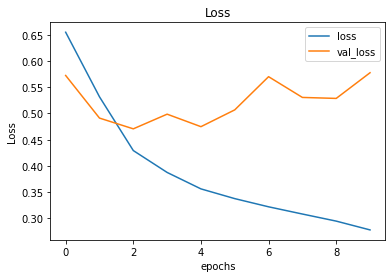

In [252]:
# plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')

Text(0, 0.5, 'Accuracy')

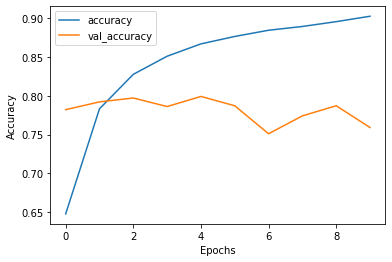

In [253]:
# plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [255]:
for i in range(len(test['text'])):
  test['text'][i]=process_tweet(test['text'][i])
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [256]:
tokenizer.fit_on_texts(test['text'])#3shan yupdate 2llist of words in each list to numerical value 
sequence2=tokenizer.texts_to_sequences(test['text'])#Transforms each text in texts to a sequence of integers
padding_sequence2=pad_sequences(sequence2,truncating='post',maxlen=20)

In [257]:
print(padding_sequence2)
print(len(padding_sequence2[0]))

[[   0    0    0 ... 1235   50   17]
 [   0    0    0 ...  416  957  202]
 [   0    0    0 ...  380 1123  111]
 ...
 [   0    0    0 ...  375   54  779]
 [   0    0    0 ...  252 1458 1546]
 [   0    0    0 ... 1292   16   74]]
20


In [258]:
x_test=pd.DataFrame(data=padding_sequence2)

In [259]:
y_pred=model.predict(padding_sequence2)

In [260]:
for i in range(len(y_pred)):
  if y_pred[i] >=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0


In [261]:
x_test['target']=y_pred

In [262]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,144,1235,50,17,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,319,828,128,416,957,202,0.0
2,0,0,0,0,0,0,0,0,0,0,...,2,584,2002,10065,2984,706,380,1123,111,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,340,247,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,190,563,12,296,1162,1.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1985,407,0.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,583,34,139,73,2342,820,3462,1.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,610,0.0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,941,538,0.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,83,0.0
